# Task 8
This notebook details the steps taken to complete each of the tasks 1 to 7, as well as containing task 9.

Author: Myles Henehan

## Task 1: Create Directory Structure
To complete task 1, I opened Codespaces and noticed instantly from the command line I was in my home directory (computer-infrastructure (main)).
I then used the command **mkdir data** to create a new folder called "data" within my home directory.


## Task 2: Timestamps
For this task, I used the command **date >> now.txt**. This first retrieved the date and then appended the output to a text file called "now.txt". Since this file did not yet exist, the command created the file the first time it was run, and then appended the output to the same file the following 10 times. I used the up arrow when repeating the command so I wouldn't have to type it out each time. I then used the command **more now.txt** to verify that the text file contained the contents I wanted. I discovered I had only repeated the command 9 times instead of 10.

Since I was making notes in this Jupyter notebook, I had forgotten that I had gone back to my home directory. As such, when I ran the command **date >> now.txt** again, it created a new text file within my home directory.

To amend this, I used the command **cat now.txt >> data/timestamps/now.txt**. This effectively read the contents of the now.txt file in my home directory and appended it to the now.txt file that was in my timestamps folder. I took care to ensure I had used ">>" rather than ">", as the latter would have overwritten my existing now.txt file.

I then double checked I was in my home directory using the command **pwd** and used **rm now.txt** to remove the file I had created by mistake.


## Task 3: Formatting Timestamps
For this task I ran the data command again, but this time I specified which format I would like the date to be in. For this, I ran the command **date "+%Y%m%d_%H%M%S" >> formatted.txt**, thus appending the formatted output to a new text file. Since I made quite a few mistakes in the format, I referred to the man page, using **man date**, to see where I was going wrong (for instance, I was using upper case M for Month, causing an error, since upper case M refers to Minute while lower case m refers to month). To exit the man page, I used **q**.

## Task 4: Create Timestamped Files
To complete this task, I used the command **touch \`date "+ %Y%m%d_%H%M%S"\`.txt**. This created a new empty text file, using the output of the date command as the file name.
In doing so, I made sure to add the .txt extension after the backtick since only the date command should be within the backticks.

## Task 5: Download Today's Weather Data
To complete this task, I first moved to the weather directory using the command cd ../weather. Here, the .. represents the parent folder, so this is a useful way of moving between directories of the same hierarchy without having to type out the full path.
To save the data from the Athenry weather station, I used the command **wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today**. The command wget retrieves data from the url provided. By using the -O extension, this allowed me to determine the name of the file this data was saved as.


## Task 6: Timestamp the Data
For this task, I repeated the steps in task 5, but this time instead of using the file name weather.json, I used the output of the date command as the file name. So, my command was as follows: **wget -O \`date "+%Y%m%d_%H%M%S"\`.json  https://prodapi.metweb.ie/observations/athenry/today**. Once again, I used the date command within backticks to set the file name to reflect the time when it was downloaded.

## Task 7: Write the Script
Returning to the root of my repository, I created the file weather.sh using the command **touch weather.sh**. Inside the file, on the first line, I added the comment "#!/bin/bash"; this tells the system to use Bash as the interpreter to execute the script.
Below this, I added my command from task 6. When I ran ./weather.sh, I got the message "Permission denied". To fix this, I used the command **chmod u+x ./weather.sh**, which gives the user (me) permission to run the script.

The first time I ran the weather.sh script, I realised it was saving the json to the root folder, so I went back to my script and added in the path where I wanted the data to be saved to. Now, my weather.sh script contains the command: **wget -O data/weather/\`date "+%Y%m%d_%H%M%S"\`.json  https://prodapi.metweb.ie/observations/athenry/today**, so each time I run it, it will save to the data/weather directory.




## Task 9: pandas
In this task, I will read in the data from one of my weather files. I will then summarise and explain some of the data.

In [2]:
import pandas as pd
pd.read_json('data/weather/20241107_163851.json')


,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,16,04n,Cloudy,"""Cloudy""",11,-,S,180,86,0,1024,Thursday,2024-07-11,00:00
1,Athenry,15,04n,Cloudy,"""Cloudy""",11,-,SE,135,89,0,1024,Thursday,2024-07-11,01:00
2,Athenry,15,04n,Cloudy,"""Cloudy""",15,-,SE,135,88,0,1023,Thursday,2024-07-11,02:00
3,Athenry,14,02n,Fair,"""Fair""",17,-,SE,135,88,0,1023,Thursday,2024-07-11,03:00
4,Athenry,13,02n,Fair,"""Fair""",15,-,SE,135,89,0,1022,Thursday,2024-07-11,04:00
5,Athenry,14,04n,Cloudy,"""Cloudy""",13,-,SE,135,89,0,1022,Thursday,2024-07-11,05:00
6,Athenry,14,02n,Fair,"""Fair""",20,-,S,180,86,0,1022,Thursday,2024-07-11,06:00
7,Athenry,14,02n,Fair,"""Fair""",22,-,SE,135,84,0,1022,Thursday,2024-07-11,07:00
8,Athenry,14,04d,Cloudy,"""Cloudy""",19,-,SE,135,85,0,1022,Thursday,2024-07-11,08:00
9,Athenry,14,04d,Cloudy,"""Cloudy""",15,-,SE,135,85,0,1022,Thursday,2024-07-11,09:00


### Explanation of the data

This dataset contains weather data taken from the Athenry weather station at 4:38pm on Thursday 7 November 2024. It provides records taken at hourly intervals from midnight until the hour preceeding the retrieval of the data. It contains a mix of numerical data points (such as temperature, wind speed, humidity and pressure levels) and categorical data points (such as Weather Description and Cardinal Wind Direction).

At a glance, we can see that it was a dry day in Athenry, with no rainfall recorded, though it was cloudy for the majority of the day. The wind direction was predominantly South to South East, which differs from the prevailing South West winds that we would normally expect on an average day in Ireland (Met Eireann).

While the majority of the dataset is complete, we only have 2 entries for Wind Gust, so it would be difficult to do any sort of analysis of this particular metric.

### Visualising the temperature change throughout the day
We can see from the plot below that the temperature did not change much through the day, ranging from 16 degrees at its highest to 13 degrees at its lowest, for a mean of 14.8°C.

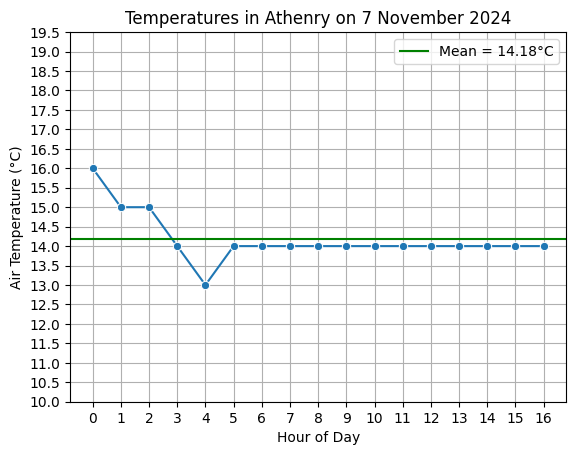

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_json('data/weather/20241107_163851.json')

temp = df['temperature']
hour = temp.index

sns.lineplot(x=hour, y=temp, marker="o")
plt.title("Temperatures in Athenry on 7 November 2024")
plt.xlabel('Hour of Day')
plt.ylabel('Air Temperature (°C)')
plt.xticks(np.arange(0,17,1))
plt.yticks(np.arange(10,20,0.5))
plt.grid()

meantemp = temp.mean()
plt.axhline(y=meantemp, color='green', label=f"Mean = {meantemp:.2f}°C")

plt.legend()
plt.show()




### Visualising the change in windspeed throughout the day.
In contrast, windspeed varied greatly throughout the day, ranging from around 11 knots at midnight to 22 knots at 7am.

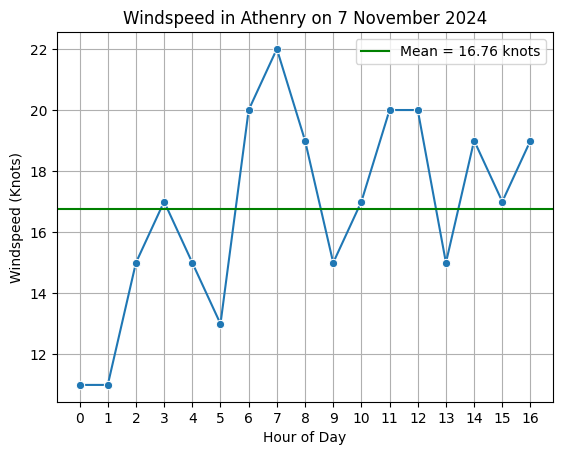

In [21]:
windspeed = df['windSpeed']
hour = windspeed.index

sns.lineplot(x=hour, y=windspeed, marker="o")
plt.title("Windspeed in Athenry on 7 November 2024")
plt.xlabel('Hour of Day')
plt.ylabel('Windspeed (Knots)')
plt.xticks(np.arange(0,17,1))
plt.grid()

meanwind = windspeed.mean()
plt.axhline(y=meanwind, color='green', label=f"Mean = {meanwind:.2f} knots")

plt.legend()
plt.show()